In [44]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import sklearn

In [46]:
mnist = fetch_openml('mnist_784', version = 1, as_frame = True)

In [47]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [61]:
X, y = mnist['data'], mnist['target']

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt

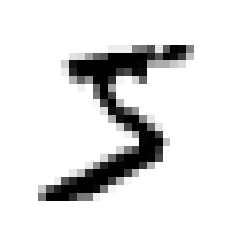

In [60]:
x0_digit = np.array(X.iloc[0,:]).reshape(28,28)
plt.imshow(x0_digit, cmap = 'binary')
plt.axis('off')
plt.show()

In [64]:
y[0]

'5'

In [77]:
y = y.astype(np.uint8)

In [78]:
x_tr, x_te, y_tr, y_te = X[:60000],X[60000:],y[:60000],y[60000:]

# 이진 분류기<br>
## 5-감지기<br>

In [80]:
y_tr5 = (y_tr == 5)
y_te5 = (y_te == 5)

In [82]:
# sgdclassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 131)
sgd_clf.fit(x_tr, y_tr5)

SGDClassifier(random_state=131)

In [90]:
sgd_clf.predict(x0_digit.reshape(1,784))

array([ True])

In [92]:
## 성능 평가
# 1. 교차검증을 통한 정확도 평가(cross validation-cv, cross_val_score())
# => 불균형한 데이터셋을 다룰 때 정확도를 분류기의 성능 측정 지표로 선호하지 않음
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_te, y_te5, cv = 3, scoring = 'accuracy')

array([0.92681464, 0.96129613, 0.96219622])

In [94]:
# 2. 오차행렬
# => 클래스가 잘못 분류된 횟수를 세는 것
from sklearn.model_selection import cross_val_predict
y_tr_pr = cross_val_predict(sgd_clf, x_tr, y_tr5, cv = 3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_tr5, y_tr_pr)
## [53082 , 1497] - 53082: 5이미지 false를 false로 분류(TN), 1497: 5이미지 false를 true로 분류(FN)
## [1383, 4038] - 1383: 5이미지 true를 false로 분류(FP), 4038: 5이미지 true를 true로 분류(TP)

array([[53082,  1497],
       [ 1383,  4038]])